$$f(x) = \sqrt{x} - \cos(0.1x), x \in [0;2]$$  
## Теоритическая справка
Разобьём отрезок на n равных частей с шагом $h = \frac{b - a}{n}$ и получим следующее разбиение отрезка: $[x_0;x_1], [x_1;x_2], ..., [x_{n-1};x_n]$, где $x_i$ - это узел интерполяции, $i = \overline{0,n}$  
Также даны значения функции в узлах интерполяции $y(x_0)=y_0,\:...\:, y(x_n)=y_n$  
Зададимся целью построить полином, который интерполирует исходную функцию.  
Данный полином должен проходить через все $n+1$ точек. Значит искомый полином имеет степень $n$. Несложно доказать единственность такого полинома.  
Следующий полином называется полиномом Лагранжа и имеет следующий вид: $$l(x)=\sum_{i=0}^n y_il_i(x), \:где$$ $$l_i(x) = \prod\limits_{j=0, j\neq i}^n\frac{x-x_j}{x_i-x_j}$$  
Главный минус полинома Лагранжа - необходимость заного перестраивать полином при добавлении нового узла интерполяции.

Следующий полином называется полиномом Ньютона и является более усовершенствованной версией полинома Лагранжа.  
Формула:$$P_n(x)=y_0 + (x-x_0)f(x_0;x_1) + (x-x_0)(x-x_1)f(x_0,x_1,x_2) + ... + (x-x_0)(x-x_1)...(x-x_{n-1})f(x_0,x_1,...,x_n),\:где$$    
$f(x_j,x_{j+1},...,x_{j+k-1},x_{j+k}) = \frac{f(x_{j+1},...,x_{j+k-1},x_{j+k}) - f(x_j,x_{j+1},...,x_{j+k-1})}{x_{j+k}-x_j}$ - разделенная разность порядка $k$  
Для неё справедлива следующая формула, которой мы будет пользовать при вычислении:
$$f(x_0,x_1,...,x_n)=\sum_{j=0}^n \frac{f(x_j)}{\prod\limits_{i=0,i\neq j}^n (x_j-x_i)}$$

In [1]:
import numpy as np
import pandas as pd

In [2]:
# sqrt(x) - cos(0.1*x), x = [0, 2]
def f(x):
    return np.sqrt(x) - np.cos(0.1 * x) if x >= 0 and x <= 2 else None

In [3]:
def frag(a, b, n):
    d = (b - a) / n # step
    arr = [a]
    for i in range(n-1):
        arr.append(round(arr[i] + d, 3))
        #arr.append(arr[i] + d)
    arr.append(b)
    return arr


def calc(arr):
    y = []
    for value in arr:
        y.append(f(value))
    return y


def l(x, pX, pY):
    ans = 0
    n = len(pY)
    for i in range(n):
        koef = 1
        for j in range(n):
            if i != j:
                koef = koef * (x - pX[j]) / (pX[i] - pX[j])
        ans += pY[i] * koef
        
    return ans


def difff(xP, yP):
    ans = 0
    n = len(xP)
    koef = 1
    for i in range(n):
        for j in range(n):
            if i != j:
                koef *= xP[i] - xP[j]
        ans += yP[i] / koef
        koef = 1
    return ans


def P(x, xP, yP):
    ans = yP[0]
    koef = 1
    for i in range(n):
        koef *= x - xP[i]
        dif = difff(xP[:i+2], yP[:i+2])
        ans += dif * koef
    return ans

In [14]:
n = 10
a = 0
b = 2
x = frag(a, b, n)
y = calc(x)

In [15]:
m = 60
newX = frag(a, b, m)
newY = calc(newX)
lagr = []
newton = []

for e in newX:
    lagr.append(l(e, x, y))
    newton.append(P(e, x, y))

In [16]:
df = pd.DataFrame()
df['x'] = newX
df['y'] = newY
df['lagrange'] = lagr
df['newton'] = newton

In [17]:
df

,x,y,lagrange,newton
0,0.000,-1.000000,-1.000000,-1.000000
1,0.033,-0.818336,-0.877307,-0.877307
2,0.066,-0.743074,-0.782247,-0.782247
3,0.099,-0.685308,-0.707401,-0.707401
4,0.132,-0.636595,-0.647166,-0.647166
5,0.165,-0.593662,-0.597374,-0.597374
6,0.198,-0.554832,-0.554971,-0.554971
7,0.231,-0.519109,-0.517763,-0.517763
8,0.264,-0.485842,-0.484206,-0.484206
9,0.297,-0.454582,-0.453236,-0.453236


<IPython.core.display.Javascript object>


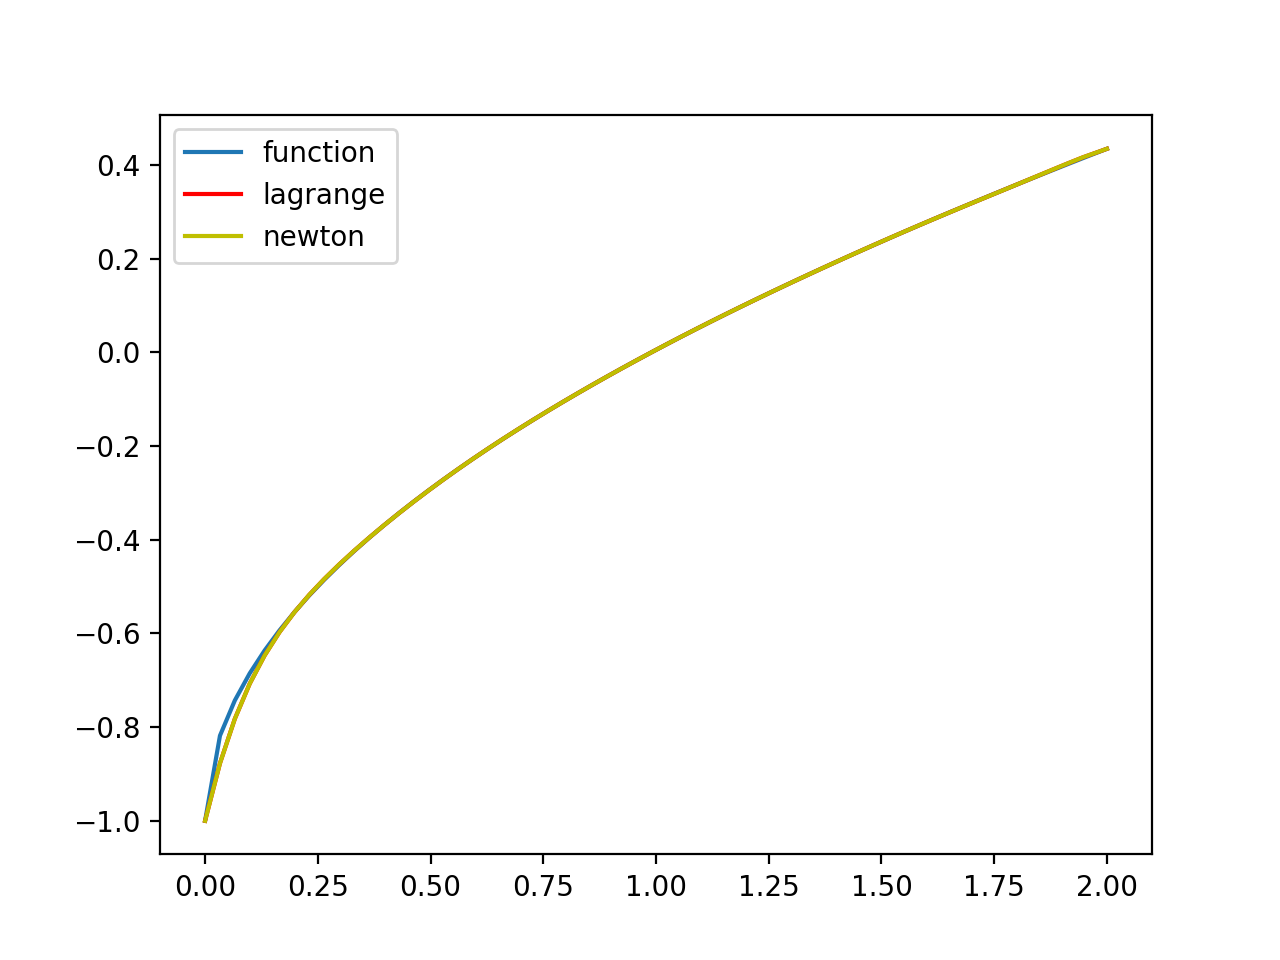

(-0.4241418507576679, -0.4241418507576677)

In [18]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.plot(df['x'], df['y'], label='function')
plt.plot(df['x'], df['lagrange'], 'r', label='lagrange')
plt.plot(df['x'], df['newton'], 'y', label='newton')
plt.legend()
plt.show()
lagr[10], newton[10]